# Data Sources

### Guangzhou Urban Traffic Speed Data Set

In [3]:
import numpy as np
import scipy.io

tensor = scipy.io.loadmat('../datasets/Guangzhou-data-set/tensor.mat')['tensor']
dense_mat = tensor.reshape([tensor.shape[0], tensor.shape[1] * tensor.shape[2]])

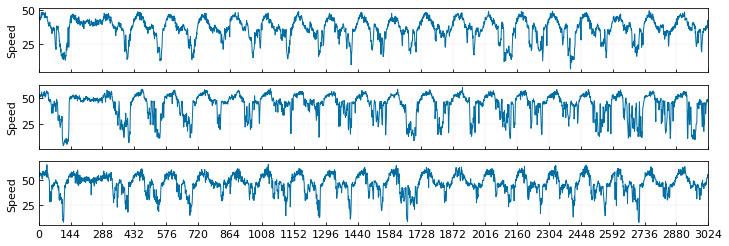

In [9]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 11
plt.rcParams['figure.constrained_layout.use'] = False

fig = plt.figure(figsize = (12, 4))
for loc in [0, 1, 2]:
    ax = fig.add_subplot(3, 1, loc + 1)
    plt.plot(dense_mat[loc, : 3 * 7 * 144], color = "#006ea3", linewidth = 1)
    plt.xticks(np.arange(0, 144 * 7 * 3 + 1, 1 * 144))
    if loc != 2:
        plt.setp(ax.get_xticklabels(), visible = False)
    plt.grid(axis = 'both', linestyle = "--", linewidth = 0.1, color = 'gray')
    plt.ylabel('Speed')
    ax.tick_params(direction = "in")
    ax.set_xlim([0, 3 * 7 * 144])
fig.savefig("Guangzhou_speed_curves_123.pdf", bbox_inches = "tight")

### Seattle Freeway Traffic Speed Data Set

In [20]:
import pandas as pd

dense_mat = pd.read_csv('../datasets/Seattle-data-set/mat.csv', index_col = 0)
NM_mat = pd.read_csv('../datasets/Seattle-data-set/NM_mat.csv', index_col = 0)
dense_mat = dense_mat.values
NM_mat = NM_mat.values
missing_rate = 0.4

## Non-random missing (NM)
binary_tensor = np.zeros((dense_mat.shape[0], 28, 288))
for i1 in range(binary_tensor.shape[0]):
    for i2 in range(binary_tensor.shape[1]):
        binary_tensor[i1, i2, :] = np.round(NM_mat[i1, i2] + 0.5 - missing_rate)
sparse_mat = np.multiply(dense_mat, binary_tensor.reshape([dense_mat.shape[0], dense_mat.shape[1]]))

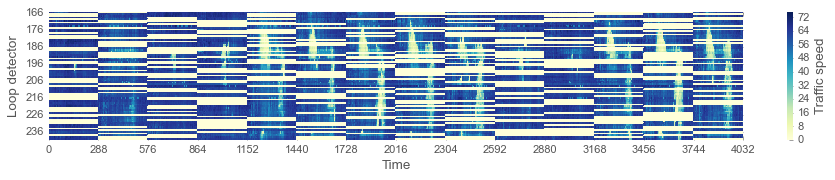

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('classic')
plt.style.use('ggplot')
plt.style.use('bmh')

plt.rcParams['font.family'] = 'Arial'
fig = plt.figure(figsize = (14, 2))
ax = fig.add_subplot(1, 1, 1)
ax = sns.heatmap(sparse_mat[165 : 240, 0 * 288 : 14 * 288], cmap = 'YlGnBu', 
                 cbar_kws={'label': 'Traffic speed'})
plt.xticks(np.arange(0, 288 * 14 + 1, 288), np.arange(0, 288 * 14 + 1, 288), rotation = 0)
plt.yticks(np.arange(0.5, 75.5, 10), np.arange(166, 241, 10), rotation = 0)
plt.xlabel('Time')
plt.ylabel('Loop detector')
plt.show()
fig.savefig("Seattle_speed_NM_mask.png", bbox_inches = "tight")

In [23]:
import numpy as np
import pandas as pd
import scipy.io
np.random.seed(1000)

missing_rate = 0.4

## Block-out Missing (BM)
dense_mat = pd.read_csv('../datasets/Seattle-data-set/mat.csv', index_col = 0).values
T = dense_mat.shape[1]
block_window = 12
vec = np.random.rand(int(T / block_window))
temp = np.array([vec] * block_window)
vec = temp.reshape([T], order = 'F')
sparse_mat = dense_mat * np.round(vec + 0.5 - missing_rate)[None, :]

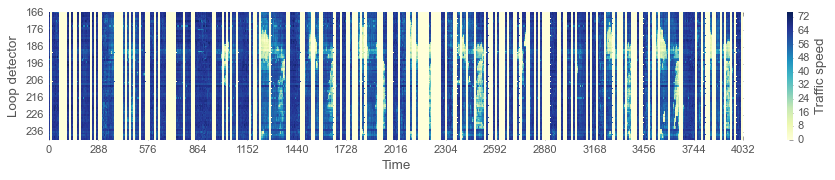

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('classic')
plt.style.use('ggplot')
plt.style.use('bmh')

plt.rcParams['font.family'] = 'Arial'
fig = plt.figure(figsize = (14, 2))
ax = fig.add_subplot(1, 1, 1)
ax = sns.heatmap(sparse_mat[165 : 240, 0 * 288 : 14 * 288], cmap = 'YlGnBu', 
                 cbar_kws={'label': 'Traffic speed'})
plt.xticks(np.arange(0, 288 * 14 + 1, 288), np.arange(0, 288 * 14 + 1, 288), rotation = 0)
plt.yticks(np.arange(0.5, 75.5, 10), np.arange(166, 241, 10), rotation = 0)
plt.xlabel('Time')
plt.ylabel('Loop detector')
plt.show()
fig.savefig("Seattle_speed_BM_mask.png", bbox_inches = "tight")

### Hangzhou Metro Passenger Flow Data Set

In [1]:
import numpy as np
import scipy.io
import warnings
warnings.simplefilter('ignore')

tensor = scipy.io.loadmat('../datasets/Hangzhou-data-set/tensor.mat')['tensor']
dense_mat = tensor.reshape([tensor.shape[0], tensor.shape[1] * tensor.shape[2]])

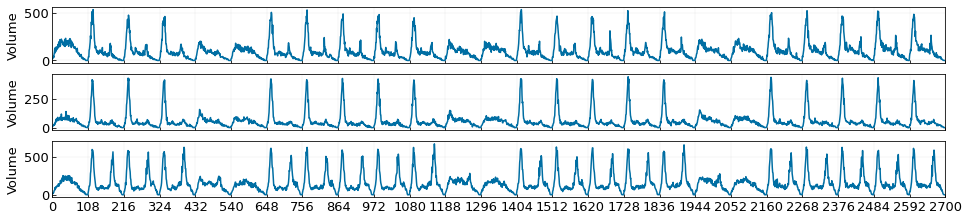

In [10]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 13
plt.rcParams['figure.constrained_layout.use'] = False

fig = plt.figure(figsize = (16, 3.5))
for loc in [0, 1, 2]:
    ax = fig.add_subplot(3, 1, loc + 1)
    plt.plot(dense_mat[loc, : 25 * 108], color = "#006ea3", linewidth = 1.5)
    plt.xticks(np.arange(0, 108 * 25 + 1, 1 * 108))
    if loc != 2:
        plt.setp(ax.get_xticklabels(), visible = False)
    plt.grid(axis = 'both', linestyle = "--", linewidth = 0.1, color = 'gray')
    plt.ylabel('Volume')
    ax.tick_params(direction = "in")
    ax.set_xlim([0, 25 * 108])
fig.savefig("Hangzhou_speed_curves_123.pdf", bbox_inches = "tight")

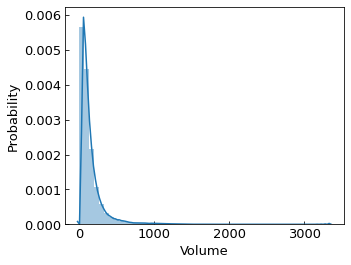

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5, 4))
ax = fig.add_subplot(1, 1, 1)
sns.distplot(dense_mat.flatten('F'))
ax.tick_params(direction = "in")
plt.xlabel('Volume')
plt.ylabel('Probability')
fig.savefig("Hangzhou_speed_distribution.pdf", bbox_inches = "tight")

### NYC Taxi Data Set

In [10]:
import scipy.io
import warnings
warnings.simplefilter('ignore')

dense_tensor = scipy.io.loadmat('../datasets/NYC-data-set/tensor.mat')['tensor'].astype(np.float32)

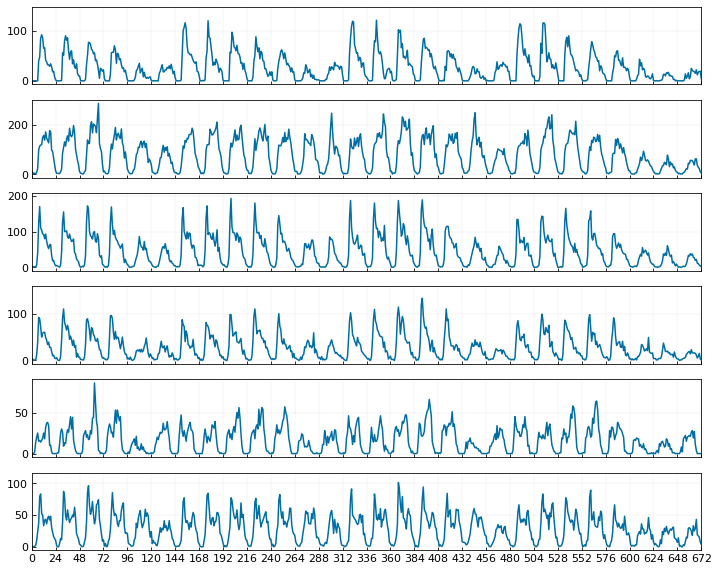

In [19]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 11
plt.rcParams['figure.constrained_layout.use'] = False

index = np.array([[16, 12], [26, 26], [16, 26], [16, 20], [12, 20], [25, 20]])

fig = plt.figure(figsize = (12, 10))
for loc in range(6):
    ax = fig.add_subplot(6, 1, loc + 1)
    plt.plot(dense_tensor[index[loc, 0], index[loc, 1], :], color = "#006ea3", linewidth = 1.5)
    plt.xticks(np.arange(0, 24 * 7 * 4 + 1, 1 * 24))
    if loc != 5:
        plt.setp(ax.get_xticklabels(), visible = False)
    plt.grid(axis = 'both', linestyle = "--", linewidth = 0.1, color = 'gray')
    ax.tick_params(direction = "in")
    ax.set_xlim([0, 4 * 7 * 24])
fig.savefig("NYC_taxi_curves.pdf", bbox_inches = "tight")

### License

<div class="alert alert-block alert-danger">
<b>This work is released under the MIT license.</b>
</div>